![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [18]:
# Start your code here!
import pandas as pd
import matplotlib.pyplot as plt
import pingouin
from scipy.stats import mannwhitneyu

In [19]:
# Load the data
df_women_results = pd.read_csv('women_results.csv')
df_men_results = pd.read_csv('men_results.csv')

# Print Info
print("Women's Results", df_women_results.info())
print("Men's Results", df_men_results.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3), object(4)
memory usage: 267.2+ KB
Women's Results None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  

Exploratory Data Analysis

In [20]:
# Head
print(df_women_results.head())
print(df_men_results.head())

   Unnamed: 0        date home_team  ... home_score  away_score        tournament
0           0  1969-11-01     Italy  ...          1           0              Euro
1           1  1969-11-01   Denmark  ...          4           3              Euro
2           2  1969-11-02   England  ...          2           0              Euro
3           3  1969-11-02     Italy  ...          3           1              Euro
4           4  1975-08-25  Thailand  ...          3           2  AFC Championship

[5 rows x 7 columns]
   Unnamed: 0        date home_team  ... home_score  away_score  tournament
0           0  1872-11-30  Scotland  ...          0           0    Friendly
1           1  1873-03-08   England  ...          4           2    Friendly
2           2  1874-03-07  Scotland  ...          2           1    Friendly
3           3  1875-03-06   England  ...          2           2    Friendly
4           4  1876-03-04  Scotland  ...          3           0    Friendly

[5 rows x 7 columns]


In [21]:
# Describe the numeric metrics
print('Women')
print(df_women_results.describe())
print("---------------------")
print("Men")
print(df_men_results.describe())

Women
        Unnamed: 0   home_score   away_score
count  4884.000000  4884.000000  4884.000000
mean   2441.500000     2.272727     1.431409
std    1410.033688     2.736377     1.974651
min       0.000000     0.000000     0.000000
25%    1220.750000     0.000000     0.000000
50%    2441.500000     1.000000     1.000000
75%    3662.250000     3.000000     2.000000
max    4883.000000    24.000000    24.000000
---------------------
Men
         Unnamed: 0    home_score    away_score
count  44353.000000  44353.000000  44353.000000
mean   22176.000000      1.740559      1.178793
std    12803.752581      1.748722      1.394580
min        0.000000      0.000000      0.000000
25%    11088.000000      1.000000      0.000000
50%    22176.000000      1.000000      1.000000
75%    33264.000000      2.000000      2.000000
max    44352.000000     31.000000     21.000000


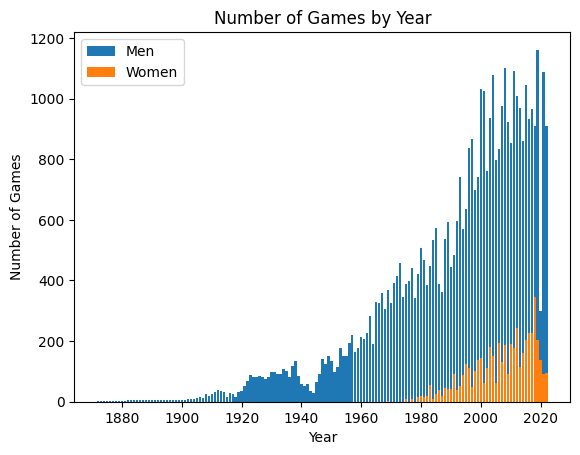

In [22]:
# Extract the year from the date field for men's results
df_men_results['year'] = pd.to_datetime(df_men_results['date']).dt.year
df_women_results['year'] = pd.to_datetime(df_women_results['date']).dt.year

# Count the number of games by year for men's results
games_by_year_men = df_men_results['year'].value_counts().sort_index()
games_by_year_women = df_women_results['year'].value_counts().sort_index()

# Create a bar chart for men's results
plt.bar(games_by_year_men.index, games_by_year_men.values, label='Men')

# Create a bar chart for women's results
plt.bar(games_by_year_women.index, games_by_year_women.values, label='Women')

plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.title('Number of Games by Year')
plt.legend()
plt.show()

<AxesSubplot: title={'center': "Women's Tournaments"}>

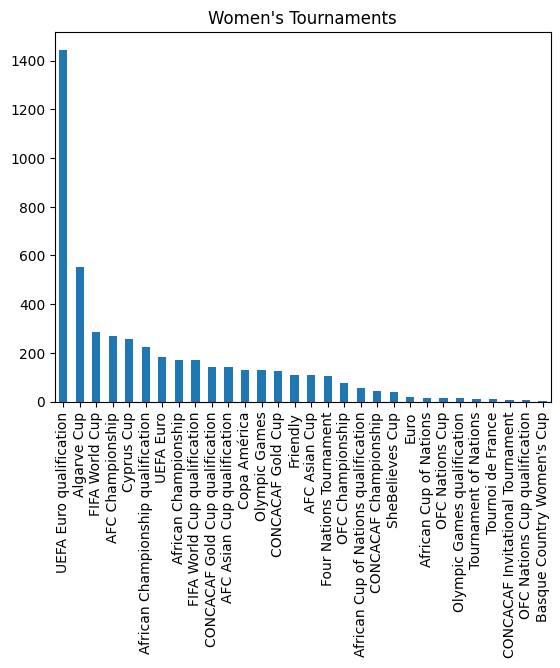

In [23]:
df_women_results['tournament'].value_counts().plot.bar(title="Women's Tournaments")

Filtering the data

In [24]:
# Combine the home and away scores
df_women_results['scores'] = df_women_results['home_score'] + df_women_results['away_score']
df_men_results['scores'] = df_men_results['home_score'] + df_men_results['away_score']

# Filter for FIFA World Cup after 2002-01-01
df_women_subset = df_women_results[(df_women_results['tournament']=='FIFA World Cup') & (df_women_results['date']>='2002-01-01')]

print('Women')
print(df_women_subset.describe())


df_men_subset = df_men_results[(df_men_results['tournament']=='FIFA World Cup') & (df_men_results['date']>='2002-01-01')]

print('Men')
print(df_men_subset.describe())

Women
        Unnamed: 0  home_score  away_score        year      scores
count   200.000000  200.000000  200.000000   200.00000  200.000000
mean   3094.485000    1.805000    1.175000  2012.20000    2.980000
std    1010.682192    1.937977    1.289453     5.68521    2.022387
min    1600.000000    0.000000    0.000000  2003.00000    0.000000
25%    2155.750000    1.000000    0.000000  2007.00000    2.000000
50%    3429.500000    1.000000    1.000000  2015.00000    3.000000
75%    4418.250000    2.000000    2.000000  2019.00000    4.000000
max    4469.000000   13.000000    7.000000  2019.00000   13.000000
Men
         Unnamed: 0  home_score  away_score         year      scores
count    384.000000  384.000000  384.000000   384.000000  384.000000
mean   34629.875000    1.375000    1.138021  2012.000000    2.513021
std     6566.923215    1.328538    1.107398     6.840213    1.652544
min    25164.000000    0.000000    0.000000  2002.000000    0.000000
25%    28769.750000    0.000000    0.00000

In [25]:
df_men_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 25164 to 44352
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  384 non-null    int64 
 1   date        384 non-null    object
 2   home_team   384 non-null    object
 3   away_team   384 non-null    object
 4   home_score  384 non-null    int64 
 5   away_score  384 non-null    int64 
 6   tournament  384 non-null    object
 7   year        384 non-null    int64 
 8   scores      384 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 30.0+ KB


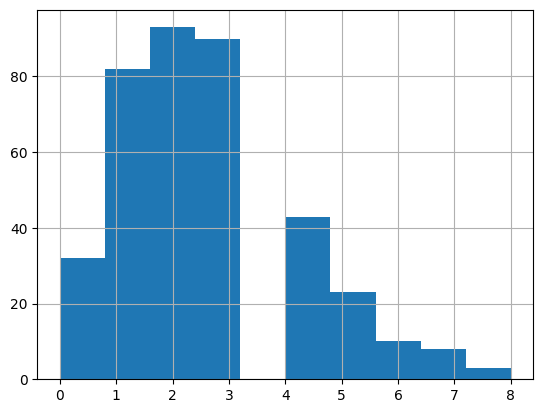

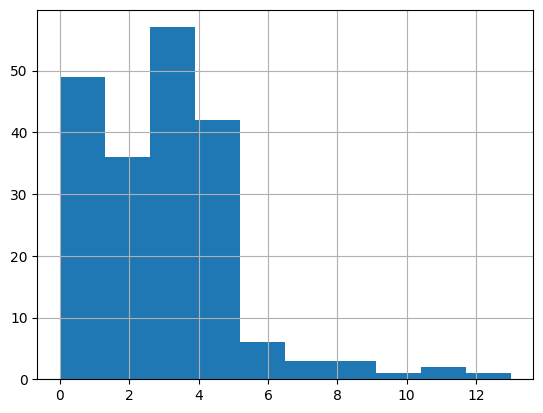

<Figure size 640x480 with 0 Axes>

In [26]:
# Determine normality using histograms
df_men_subset['scores'].hist()
plt.show()
plt.clf()

# Goals scored is not normally distributed, so use Wilcoxon-Mann-Whitney test of two groups
df_women_subset['scores'].hist()
plt.show()
plt.clf()

Chosing the correct hypothesis test

In [27]:
# Combine women's and men's data and calculate goals scored in each match
df_men_subset["group"] = "men"
df_women_subset["group"] = "women"
both = pd.concat([df_women_subset, df_men_subset], axis=0, ignore_index=True)

# Transform the data for the pingouin Mann-Whitney U t-test/Wilcoxon-Mann-Whitney test
both_subset = both[["scores", "group"]]
both_subset_wide = both_subset.pivot(columns="group", values="scores")

# Perform right-tailed Wilcoxon-Mann-Whitney test with pingouin
results_pg = pingouin.mwu(x=both_subset_wide["women"],
                          y=both_subset_wide["men"],
                          alternative="greater")

# Alternative SciPy solution: Perform right-tailed Wilcoxon-Mann-Whitney test with scipy
results_scipy = mannwhitneyu(x=df_women_subset["scores"],
                             y=df_men_subset["scores"],
                             alternative="greater")

# Extract p-value as a float
p_val = results_pg["p-val"].values[0]

# Determine hypothesis test result using sig. level
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}

In [28]:
result_dict

{'p_val': 0.005106609825443641, 'result': 'reject'}